# Graph Learning
## Lab 2: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Fredo Alejos Arrieta

## Import

In [ ]:
from IPython.display import SVG

In [ ]:
import numpy as np
from scipy import sparse

In [ ]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [ ]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [ ]:
n = 10

In [ ]:
dataset = linear_graph(n, True)
adjacency = dataset.adjacency
position = dataset.position

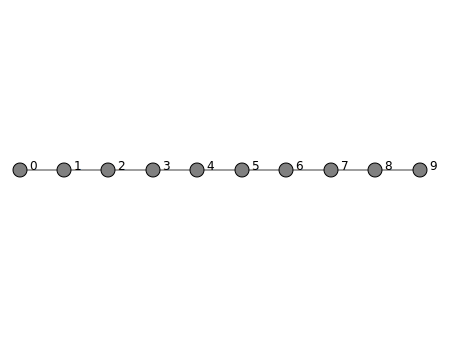

In [ ]:
image = visualize_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$ (no restarts)? Justify your answer.

In [ ]:
pagerank = PageRank(damping_factor=0.9999999, solver='lanczos')

In [ ]:
scores = pagerank.fit_predict(adjacency)
print(scores)

[0.05555556 0.11111112 0.11111111 0.11111111 0.1111111  0.1111111
 0.11111111 0.11111111 0.11111112 0.05555556]


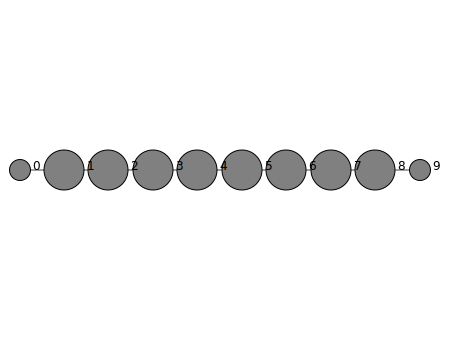

In [ ]:
image = visualize_graph(adjacency, position, names=np.arange(n), node_weights=scores)
SVG(image)

- For a value of $\alpha$ greater than 0 but lower than 1, the two best ranked nodes are the number 2 and 8. For low values this can be explained with the effects of the neighbor sampling.
- For the value of $\alpha=1$ the vector tend to [1/18,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/18]. This was obtained after putting values of $\alpha$ pretty close to 1.

## Les Misérables


In [ ]:
dataset = miserables(True)

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

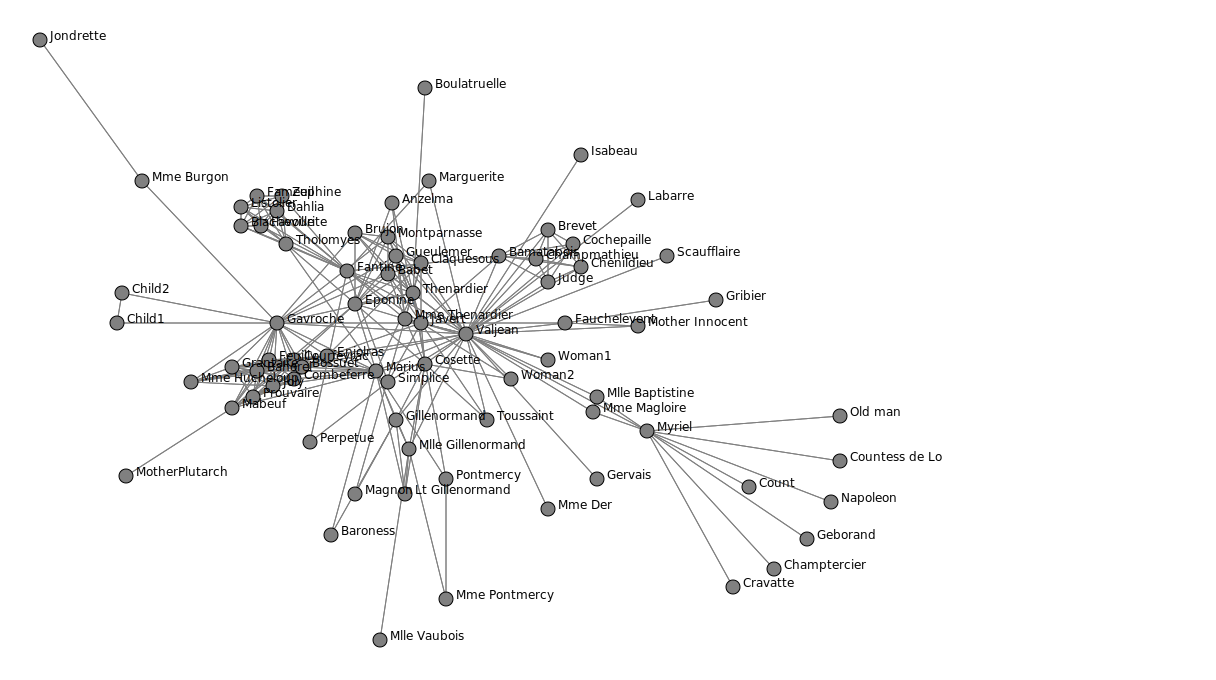

In [ ]:
image = visualize_graph(adjacency, position, names, scale=2)
SVG(image)

## To do

* Display the graph of Les Misérables with PageRank scores.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees
    2. the 10 nodes of highest weights
* Try different values of $\alpha$ and interpret the results.

In [ ]:
pagerank = PageRank(damping_factor=0.85)

In [ ]:
scores = pagerank.fit_predict(adjacency)

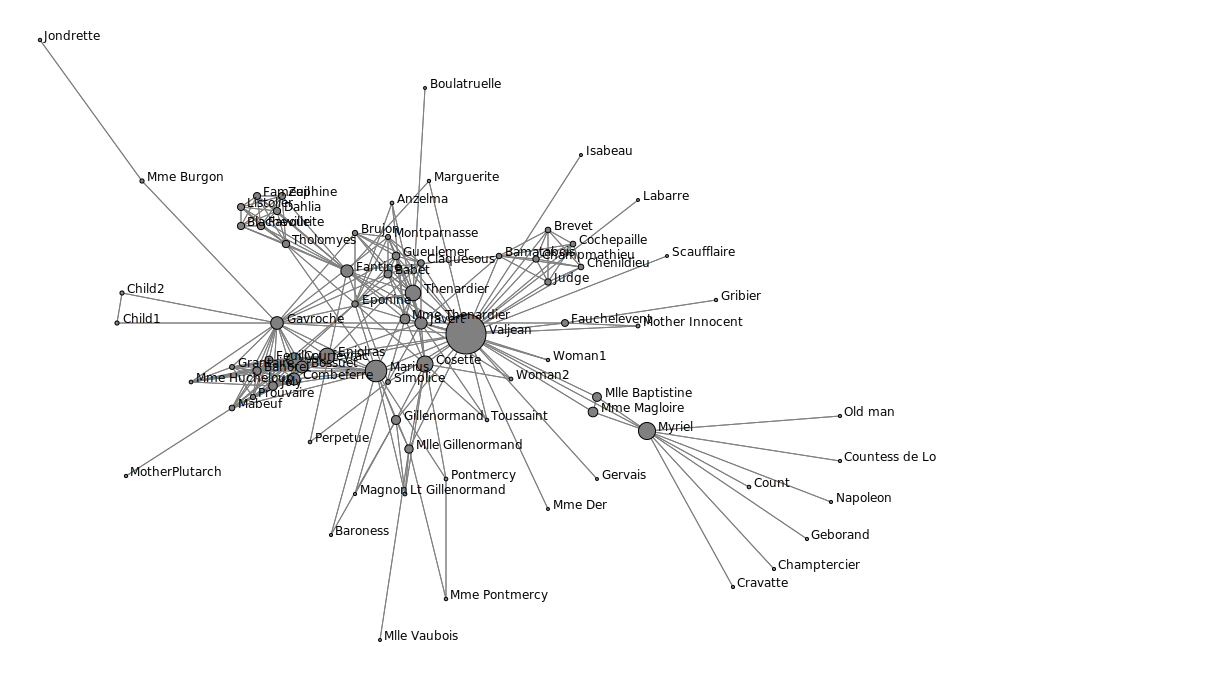

In [ ]:
# scores in log scale appear more clearly
image = visualize_graph(adjacency, position, names, node_weights=scores, scale=2)
SVG(image)

In [ ]:
top_10_pagerank_index=np.argsort(scores)[-10:][::-1]
top_10_pagerank=names[top_10_pagerank_index]
print("The top 10 best ranked characters are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_pagerank[i-1])


The top 10 best ranked characters are:
Top  1:  Valjean
Top  2:  Marius
Top  3:  Myriel
Top  4:  Cosette
Top  5:  Enjolras
Top  6:  Thenardier
Top  7:  Courfeyrac
Top  8:  Gavroche
Top  9:  Fantine
Top  10:  Javert


In [ ]:
adj=adjacency.toarray()
degree = np.count_nonzero(adj,axis=1)

top_10_degree_index=np.argsort(degree)[-10:][::-1]
top_10_degree=names[top_10_degree_index]
print("The top 10 greatest degree characters are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_degree[i-1])


The top 10 greatest degree characters are:
Top  1:  Valjean
Top  2:  Gavroche
Top  3:  Marius
Top  4:  Javert
Top  5:  Thenardier
Top  6:  Fantine
Top  7:  Enjolras
Top  8:  Courfeyrac
Top  9:  Bossuet
Top  10:  Joly


In [ ]:
weight = np.sum(adj,axis=0)

top_10_weight_index=np.argsort(weight)[-10:][::-1]
top_10_weight=names[top_10_weight_index]
print("The top 10 more weighted characters are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_weight[i-1],end=" ")
    print("with ",weight[top_10_weight_index[i-1]])


The top 10 more weighted characters are:
Top  1:  Valjean with  158
Top  2:  Marius with  104
Top  3:  Enjolras with  91
Top  4:  Courfeyrac with  84
Top  5:  Cosette with  68
Top  6:  Combeferre with  68
Top  7:  Bossuet with  66
Top  8:  Thenardier with  61
Top  9:  Gavroche with  56
Top  10:  Fantine with  47


The top 10 weighted is different to the top 10 degree, this is due to the fact that the degree of a node just counts the amount of edges while the weight obtains the sum of the weights of the edges. If the weights of the edges were all the same, the top 10 in degrees and weights would be the same.

## Openflights


In [ ]:
dataset = openflights

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

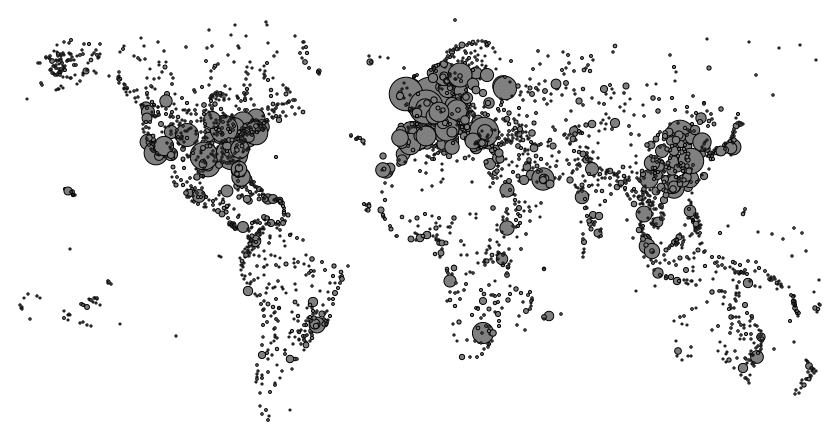

In [ ]:
# hide the edges for better visualization
image = visualize_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Display the same world map with PageRank scores (in log scale).
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [ ]:
pagerank = PageRank()

In [ ]:
scores = pagerank.fit_predict(adjacency)

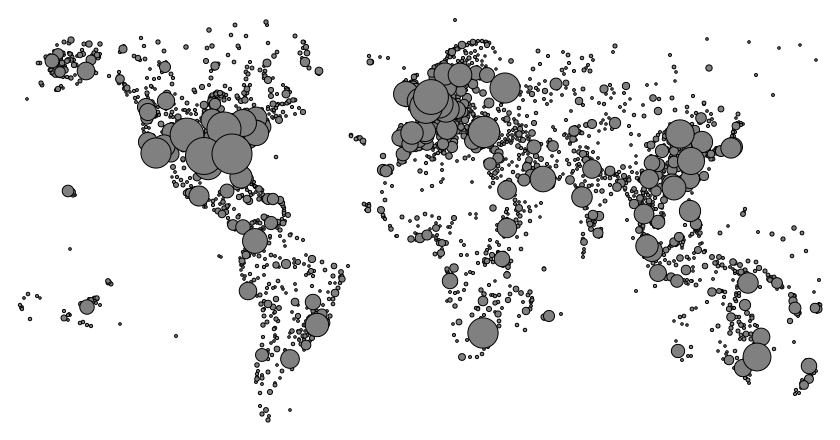

In [ ]:
image = visualize_graph(adjacency, position, node_weights=(scores), node_order=np.argsort(scores),
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [ ]:
top_10_pagerank_index=np.argsort(scores)[-10:][::-1]
top_10_pagerank=names[top_10_pagerank_index]
print("The top 10 best ranked airports are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_pagerank[i-1])

The top 10 best ranked airports are:
Top  1:  Hartsfield Jackson Atlanta International Airport
Top  2:  Dallas Fort Worth International Airport
Top  3:  Amsterdam Airport Schiphol
Top  4:  Chicago O'Hare International Airport
Top  5:  Denver International Airport
Top  6:  Charles de Gaulle International Airport
Top  7:  Atatürk International Airport
Top  8:  OR Tambo International Airport
Top  9:  Los Angeles International Airport
Top  10:  Domodedovo International Airport


In [ ]:
adj=adjacency.toarray()

weight = np.sum(adj,axis=0)

top_10_weight_index=np.argsort(weight)[-10:][::-1]
top_10_weight=names[top_10_weight_index]
print("The top 10 airport with highest traffic are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_weight[i-1],end=" ")
    print("with ",weight[top_10_weight_index[i-1]])

The top 10 airport with highest traffic are:
Top  1:  Amsterdam Airport Schiphol with  492
Top  2:  Charles de Gaulle International Airport with  413
Top  3:  Dublin Airport with  408
Top  4:  Munich International Airport with  386
Top  5:  Hartsfield Jackson Atlanta International Airport with  382
Top  6:  London Gatwick Airport with  376
Top  7:  Frankfurt am Main International Airport with  369
Top  8:  Atatürk International Airport with  354
Top  9:  Dallas Fort Worth International Airport with  334
Top  10:  Beijing Capital International Airport with  332


In [ ]:
indices=np.where(np.char.find(names,"Cairo")!=-1)[0]
print(names[indices]) #Finding the score of Tokyo
weights=np.zeros(names.shape)
weights[indices]=1
scores = pagerank.fit_predict(adjacency,weights=weights)

['Cairo International Airport']


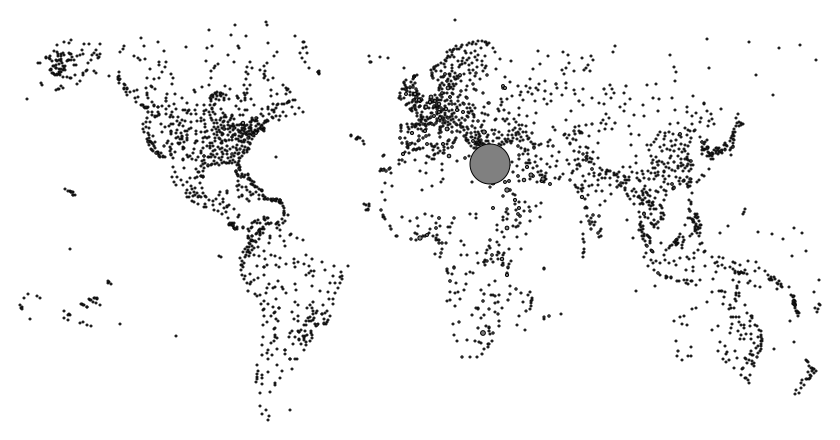

In [ ]:
image = visualize_graph(adjacency, position, node_weights=scores, node_order=np.argsort(scores),
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [ ]:
top_10_pagerank_index=np.argsort(scores)[-11:][::-1]
top_10_pagerank=names[top_10_pagerank_index]
print("The top 10 best ranked airports for a personalized pagerank with Tokyo airport are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_pagerank[i-1])

The top 10 best ranked airports for a personalized pagerank with Tokyo airport are:
Top  1:  Cairo International Airport
Top  2:  OR Tambo International Airport
Top  3:  King Abdulaziz International Airport
Top  4:  Kotoka International Airport
Top  5:  Dubai International Airport
Top  6:  Atatürk International Airport
Top  7:  King Fahd International Airport
Top  8:  Aswan International Airport
Top  9:  Leonardo da Vinci–Fiumicino Airport
Top  10:  Amsterdam Airport Schiphol


## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
dataset = wikivitals

In [ ]:
adjacency = dataset.adjacency
names = dataset.names

In [ ]:
indices=np.where(np.char.find(names,"Picasso")!=-1)[0]

## To do

* List the 10 best ranked articles of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [ ]:
pagerank = PageRank()

scores = pagerank.fit_predict(adjacency)

In [ ]:
top_10_pagerank_index=np.argsort(scores)[-10:][::-1]
top_10_pagerank=names[top_10_pagerank_index]
print("The top 10 best ranked articles of Wikipedia Vitals are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_pagerank[i-1])

The top 10 best ranked articles of Wikipedia Vitals are:
Top  1:  United States
Top  2:  World War II
Top  3:  The New York Times
Top  4:  Geographic coordinate system
Top  5:  Latin
Top  6:  India
Top  7:  China
Top  8:  France
Top  9:  United Kingdom
Top  10:  World War I


In [ ]:
adj=adjacency.toarray()
degree = np.count_nonzero(adj,axis=1)

top_10_degree_index=np.argsort(degree)[-10:][::-1]
top_10_degree=names[top_10_degree_index]
print("The top 10 highest out-degree articles are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_degree[i-1])


The top 10 highest out-degree articles are:
Top  1:  Europe
Top  2:  Africa
Top  3:  History of art
Top  4:  France
Top  5:  Latin America
Top  6:  Human history
Top  7:  South America
Top  8:  Asia
Top  9:  Biology
Top  10:  Human


In [ ]:
adj=adjacency.toarray()
degree = np.count_nonzero(adj,axis=0)

top_10_degree_index=np.argsort(degree)[-10:][::-1]
top_10_degree=names[top_10_degree_index]
print("The top 10 highest in-degree articles are:")
for i in range(1,11):
    print("Top ",i,end="")
    print(": ",top_10_degree[i-1])

The top 10 highest in-degree articles are:
Top  1:  United States
Top  2:  The New York Times
Top  3:  World War II
Top  4:  India
Top  5:  China
Top  6:  France
Top  7:  Geographic coordinate system
Top  8:  United Kingdom
Top  9:  Latin
Top  10:  Australia


The articles in the top in-degree represent the articles that are more referenced while the articles of the top out-degree represent the articles that refers more other articles.

In [ ]:
top_20_pagerank_index=np.argsort(scores)[-20:][::-1]

degree = np.count_nonzero(adj,axis=0)
top_20_degree_index=np.argsort(degree)[-20:][::-1]

only_in_pagerank_index=np.setdiff1d(top_20_pagerank_index,top_20_degree_index)
only_in_pagerank=names[only_in_pagerank_index]

print("The article that is in top 20 pagerank but not in the top 20 in-degree:",only_in_pagerank[0])

The article that is in top 20 pagerank but not in the top 20 in-degree: Greek language


## To do

* List the 20 closest articles to **Picasso** in Wikipedia Vitals. Who is the best ranked painter other than Picasso?
* List the 20 closest articles to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, do the same using the difference between the Personalized PageRank score and the PageRank score. Interpret the results.

In [ ]:
indices=np.where(np.char.find(names,"Picasso")!=-1)[0]
print(names[indices])
weights=np.zeros(names.shape)
weights[indices[1]]=1
scores_picasso = pagerank.fit_predict(adjacency,weights=weights)

top_20_pagerank_index=np.argsort(scores_picasso)[-20:][::-1]

top_20_pagerank=names[top_20_pagerank_index]
print("The top 20 closest articles to Picasso of Wikipedia Vitals are:")
for i in range(1,21):
    print("Top ",i,end="")
    print(": ",top_20_pagerank[i-1])

['Guernica (Picasso)' 'Pablo Picasso']
The top 20 closest articles to Picasso of Wikipedia Vitals are:
Top  1:  Pablo Picasso
Top  2:  The New York Times
Top  3:  World War II
Top  4:  World War I
Top  5:  Paris
Top  6:  Modernism
Top  7:  Museum of Modern Art
Top  8:  Cubism
Top  9:  Romanticism
Top  10:  Impressionism
Top  11:  Metropolitan Museum of Art
Top  12:  Symbolism (arts)
Top  13:  Surrealism
Top  14:  Modern art
Top  15:  United States
Top  16:  Time (magazine)
Top  17:  Paul Cézanne
Top  18:  Vincent van Gogh
Top  19:  Post-Impressionism
Top  20:  Dada


The best ranked painter other than Picasso is Paul Cézanne

In [ ]:
indices=np.where(np.char.find(names,"Cat")!=-1)[0]
print(names[indices])
weights=np.zeros(names.shape)
weights[indices[0]]=1
indices=np.where(np.char.find(names,"Dog")!=-1)[0]
print(names[indices])
weights[indices[0]]=1

['Cat' 'Catalonia' 'Catalysis' 'Catapult' 'Category theory' 'Catfish'
 "Catherine de' Medici" 'Catherine the Great' 'Cathode-ray tube'
 'Catholic Church' 'Catholicity' 'Cato the Elder' 'Cattle' 'Catullus'
 'Chartres Cathedral' 'Eastern Catholic Churches' 'Florence Cathedral'
 'Raymond Cattell' 'The Catcher in the Rye']
['Dog']


In [ ]:
scores_cat_dog = pagerank.fit_predict(adjacency,weights=weights)

top_20_pagerank_index=np.argsort(scores_cat_dog)[-20:][::-1]

top_20_pagerank=names[top_20_pagerank_index]
print("The top 20 closest articles to 'Cat' and 'Dog' of Wikipedia Vitals are:")
for i in range(1,21):
    print("Top ",i,end="")
    print(": ",top_20_pagerank[i-1])

The top 20 closest articles to 'Cat' and 'Dog' of Wikipedia Vitals are:
Top  1:  Dog
Top  2:  Cat
Top  3:  Taxonomy (biology)
Top  4:  Animal
Top  5:  Mammal
Top  6:  Chordate
Top  7:  Latin
Top  8:  Carl Linnaeus
Top  9:  World War II
Top  10:  Carnivora
Top  11:  Pinniped
Top  12:  Lion
Top  13:  Leopard
Top  14:  Brown bear
Top  15:  Fox
Top  16:  Polar bear
Top  17:  Hyena
Top  18:  Coyote
Top  19:  Bear
Top  20:  Jaguar


In [ ]:
scores_picasso_diff=scores_picasso-scores

top_20_diff_index=np.argsort(scores_picasso_diff)[-20:][::-1]

top_20_picasso_diff=names[top_20_diff_index]
print("The top 20 highest differences with of the general pagerank to the personalized pagerank with 'Picasso' of Wikipedia Vitals are:")
for i in range(1,21):
    print("Top ",i,end="")
    print(": ",top_20_picasso_diff[i-1])

The top 20 highest differences with of the general pagerank to the personalized pagerank with 'Picasso' of Wikipedia Vitals are:
Top  1:  Pablo Picasso
Top  2:  Modernism
Top  3:  Museum of Modern Art
Top  4:  Cubism
Top  5:  Paris
Top  6:  Impressionism
Top  7:  Surrealism
Top  8:  Symbolism (arts)
Top  9:  Modern art
Top  10:  Metropolitan Museum of Art
Top  11:  Paul Cézanne
Top  12:  Post-Impressionism
Top  13:  Vincent van Gogh
Top  14:  Dada
Top  15:  Édouard Manet
Top  16:  Paul Gauguin
Top  17:  Expressionism
Top  18:  Romanticism
Top  19:  World War I
Top  20:  Henri Matisse


The meaning of the

## To do

* List 5 representative articles of each category.

In [ ]:
# there are 11 categories
labels = dataset.labels
names_labels = dataset.names_labels
adj=adjacency.toarray()

In [ ]:
scores_index = np.argsort(scores)[::-1]

for i in range(len(names_labels)):
    print(f"Top 5 in PageRank score for label \"{names_labels[i]}\":")
    iter = 0
    for k in scores_index:
        if (iter < 5):
            if (labels[k] == i):
                name = names[k]
                score = scores[k]
                print(f"Node: {name} with a score of {score:.6f}")
                iter += 1
        else:
            print()
            break

Top 5 in PageRank score for label "Arts":
Node: Encyclopædia Britannica with a score of 0.000953
Node: Oxford English Dictionary with a score of 0.000473
Node: Romanticism with a score of 0.000394
Node: Modernism with a score of 0.000358
Node: Baroque with a score of 0.000330

Top 5 in PageRank score for label "Biological and health sciences":
Node: Taxonomy (biology) with a score of 0.000861
Node: Animal with a score of 0.000750
Node: Protein with a score of 0.000570
Node: Bacteria with a score of 0.000518
Node: Plant with a score of 0.000509

Top 5 in PageRank score for label "Everyday life":
Node: Association football with a score of 0.000544
Node: Basketball with a score of 0.000338
Node: Olympic Games with a score of 0.000298
Node: Cricket with a score of 0.000230
Node: Baseball with a score of 0.000230

Top 5 in PageRank score for label "Geography":
Node: United States with a score of 0.002065
Node: Geographic coordinate system with a score of 0.001557
Node: India with a score of

## 3. Bipartite graphs

## Cinema

In [ ]:
dataset = cinema

In [ ]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do


* List the 5 closest actors and the 5 closest movies to **Catherine Deneuve**.

In [ ]:
pagerank1 = PageRank()
pagerank2 = PageRank()

n_movies, n_actors = biadjacency.shape

diagonal_1 = biadjacency @ np.ones(n_actors).T
diagonal_2 = biadjacency.T @ np.ones(n_movies).T
D1 = sparse.diags(diagonal_1)
D2 = sparse.diags(diagonal_2)
inv_diagonal_1 = 1.0 / diagonal_1
inv_diagonal_2 = 1.0 / diagonal_2
P1 = sparse.diags(inv_diagonal_1) @ biadjacency        # movies to actors
P2 = sparse.diags(inv_diagonal_2) @ biadjacency.T      # actors to movies

P1_P2 = P1 @ P2         # movies to movies adjecency matrix
P2_P1 = P2 @ P1         # actors to actors adjecency matrix

deneuve_index = np.where(np.char.find(actors, "Catherine Deneuve") != -1)[0]
print(deneuve_index)

weights = np.zeros(P2_P1.shape[1])
weights[deneuve_index] = 1

#scores1 = pagerank1.fit_predict(P1_P2, weights = weights @ P2)          # scores movies
scores_2 = pagerank1.fit_predict(P2_P1, weights = weights)               # scores actors
scores_1 = pagerank1.fit_predict(P1_P2, weights = scores_2 @ P2)          # scores movies

scores_index_1 = np.argsort(scores_1)[::-1]
scores_index_2 = np.argsort(scores_2)[::-1]

print("Top 5 closest movies to Catherine Deneuve according to the PageRank:")
iter = 0
for index in scores_index_1:
    if (iter < 5):
        movie = movies[index]
        score = scores_1[index]
        print(f"Node {movie} with a score of {score:.5f}")
        iter += 1
    else:
        print()
        break

print("Top 5 closest actors to Catherine Deneuve according to the PageRank:")
iter = 0
for index in scores_index_2:
    if (iter < 6):
        actor = actors[index]
        score = scores_2[index]
        print(f"Node {actor} with a score of {score:.5f}")
        iter += 1
    else:
        break

[2173]
Top 5 closest movies to Catherine Deneuve according to the PageRank:
Node Pola X with a score of 0.00146
Node The Umbrellas of Cherbourg with a score of 0.00133
Node The Beloved (2011 film) with a score of 0.00130
Node Belle maman with a score of 0.00124
Node Écoute voir with a score of 0.00123

Top 5 closest actors to Catherine Deneuve according to the PageRank:
Node Catherine Deneuve with a score of 0.22368
Node Marcello Mastroianni with a score of 0.00868
Node Gérard Depardieu with a score of 0.00834
Node Michel Piccoli with a score of 0.00693
Node Chiara Mastroianni with a score of 0.00538
Node Jean-Louis Trintignant with a score of 0.00444


## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph.

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [ ]:
dataset = wikivitals

In [ ]:
adjacency = dataset.adjacency
names = dataset.names

## To do

Do the same experiments as above and compare both rankings:
* List the 10 best ranked articles of Wikipedia Vitals.
* List the 20 closest articles to **Picasso** in Wikipedia Vitals.
* List the 20 closest articles to both **Cat** and **Dog** in Wikipedia Vitals.

In [ ]:
scores = pagerank.fit_predict(adjacency, force_bipartite=True)

In [ ]:
scores_index = np.argsort(scores)[::-1]

print("Top 10 nodes given by PageRank:")
for index in scores_index[:10]:
    name = names[index]
    score = scores[index]
    print(f"Node {name} with a score of {score:.5f}")

Top 10 nodes given by PageRank:
Node Europe with a score of 0.00038
Node History of art with a score of 0.00034
Node France with a score of 0.00033
Node Africa with a score of 0.00033
Node Human history with a score of 0.00032
Node Latin America with a score of 0.00031
Node South America with a score of 0.00031
Node Biology with a score of 0.00030
Node Human with a score of 0.00028
Node Asia with a score of 0.00028


In [ ]:
weights = np.zeros(adjacency.shape[0])
picasso_index = np.where(np.char.find(names, "Pablo Picasso") != -1)[0]
print(picasso_index)
weights[picasso_index] = 1
scores = pagerank.fit_predict(adjacency, force_bipartite=True, weights = weights)

scores_index = np.argsort(scores)[::-1]

print("Top 20 closest articles to Pablo Picasso:")
k=0
for index in scores_index[:21]:
    name = names[index]
    score = scores[index]
    k+=1
    print(f"{k}. {name} with a score of {score:.5f}")

[6736]
Top 20 closest articles to Pablo Picasso:
1. Pablo Picasso with a score of 0.15225
2. Modernism with a score of 0.00225
3. Cubism with a score of 0.00206
4. Modern art with a score of 0.00203
5. Impressionism with a score of 0.00196
6. Surrealism with a score of 0.00195
7. Les Demoiselles d'Avignon with a score of 0.00195
8. Symbolism (arts) with a score of 0.00195
9. Modern architecture with a score of 0.00195
10. Abstract expressionism with a score of 0.00193
11. Expressionism with a score of 0.00191
12. Pop art with a score of 0.00191
13. Dada with a score of 0.00190
14. Avant-garde with a score of 0.00190
15. Futurism with a score of 0.00190
16. Minimalism with a score of 0.00188
17. Postmodernism with a score of 0.00188
18. Thomas Mann with a score of 0.00187
19. Paul Klee with a score of 0.00186
20. Hermann Hesse with a score of 0.00186
21. Franz Kafka with a score of 0.00184
